# Underfitting and Overfitting



[Visually interesting statistics concepts](https://stats.stackexchange.com/questions/452148/visually-interesting-statistics-concepts-that-are-easy-to-explain)



## Underfitting





*   Model performs poorly on training data AND poorly on evaluation data
*   Model is unable to capture relationship between input data and target data (x and y) values
*  Model is not detailed enough - i.e. a straight line to model something that is exponential





## Overfitting



*  Model performs well on training data but NOT on evaluation data
*  "Memorizing the training data"
*  Unable to generalize





## Example



Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



Define original function and generate sample data with random error added in.  Degrees sets the number and degrees of polynomials we will use to model our data.  


In [2]:

# this is our original function
# our dataset will be generated using this function and then adding in some random error
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# np.random.seed(0) makes predictable 'random' numbers - the same every time
# np.random.seed() makes more truly random numbers - different every time
np.random.seed(11)
n_samples = 30

# degrees for polynomials for our models. 1 is a straight line.
degrees = [1, 2, 3, 4, 12]

# randomly generate x values for sample.  these will be between 0 and 1.
X = np.sort(np.random.rand(n_samples))

# use our original function + some ramdom error to generate y values
y = true_fun(X) + np.random.randn(n_samples) * 0.3


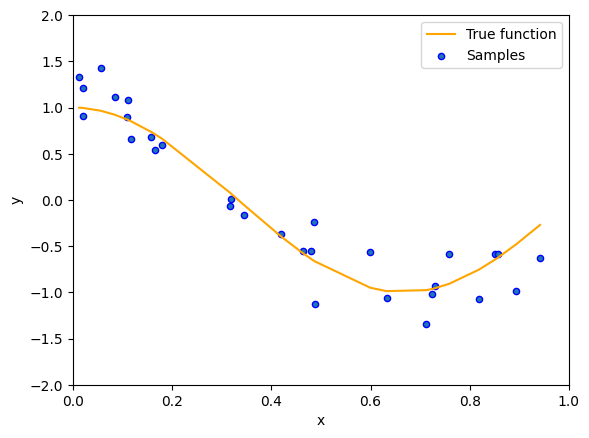

In [3]:
# Plot our true function
plt.figure()
plt.plot(X, true_fun(X), label="True function", color = 'orange')
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best") ;


For each degree:
 - generate model
 - evaluate the model on training data, on testing data, and using cross validation
 - plot the model, the original function and the sample data


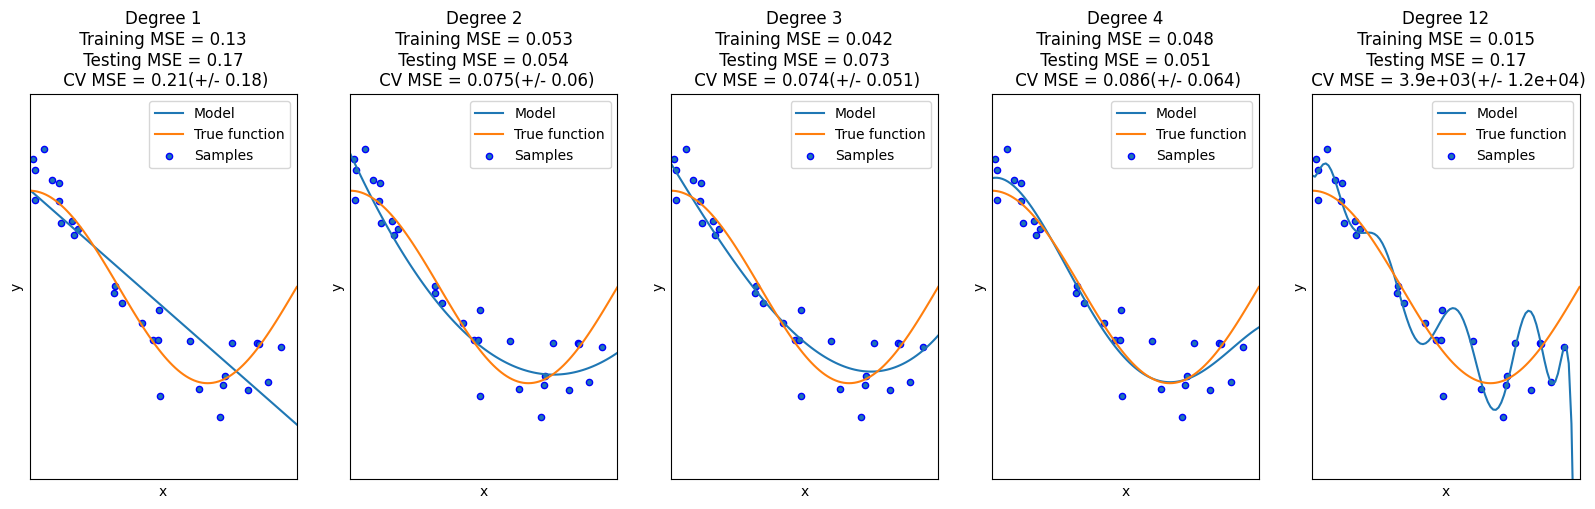

In [4]:

plt.figure(figsize=(20, 5))

# run everything for our different models based on degrees
for i in range(len(degrees)):
    # position the plot so it sits in line next to the other ones
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # create model
    # polynomial features creates a matrix consisting of all polynomial
    #combinations of the features with degree less than or equal to the
    # specified degree ex. degree = 2 returns 1, a, b, a^2, ab, b^2
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()

    # pipeline sequentially applies a list of transforms and a final estimator
    # (first applies the polynomial features function, then linear reg.)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # np.newaxis is used to increase the dimension of the existing array by one
    # more dimension, when used once. Reshapes to 2D array which is required for
    # some methods
    pipeline.fit(X[:, np.newaxis], y)

    # Break into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

    # Evaluate the models using training set
    pipeline.fit(X_train[:, np.newaxis],y_train)
    y_pred_train = pipeline.predict(X_train[:, np.newaxis])
    train_mse = mean_squared_error(y_train, y_pred_train)

    # Evaluate the models using testing set
    y_pred_test = pipeline.predict(X_test[:, np.newaxis])
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Add data to plot
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n Training MSE = {:.2} \n Testing MSE = {:.2} \n CV MSE = {:.2}(+/- {:.2})".format(
        degrees[i], train_mse, test_mse, -scores.mean(), scores.std()))

# show the plot
plt.show()


We notice the following results:


*   For Degree 1, the model is performing poorly for both the training and testing sets. It also has a high MSE when using cross validation. This is an example of underfitting.
*   For Degree 4, the model performs well for both the training and testing sets and it has the lowest cross validation MSE.
*   For Degree 12, the model performs well for the training set but poorly for the testing set. It also has the highest cross validation MSE. This is an example of overfitting.




## Sources

[Amazon Maching Learning- Model Fit: Underfitting vs Overfitting](https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html)

[scikit-learn Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

[Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)


